# Sentiment Analysis using NLP (Intermediate)

This notebook demonstrates an end-to-end sentiment analysis pipeline using
Natural Language Processing (NLP) and machine learning techniques.
The project focuses on linguistic preprocessing, TF-IDF feature extraction,
and supervised classification models.


In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


df = pd.read_csv("../data/tweets.csv")
df.head()


In [3]:
nlp = spacy.load("en_core_web_sm")


In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    doc = nlp(text)
    tokens = [
        token.lemma_
        for token in doc
        if not token.is_stop and not token.is_punct
    ]
    return " ".join(tokens)



In [5]:
data = {
    "text": [
        "I love learning NLP",
        "This is a terrible experience",
        "The course is okay",
        "I enjoy data science projects",
        "I hate wasting time",
        "This program is very useful",
        "The lectures are boring",
        "I am happy with the results"
    ],
    "sentiment": [
        "positive",
        "negative",
        "neutral",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive"
    ]
}

df = pd.DataFrame(data)
df


,text,sentiment
0,I love learning NLP,positive
1,This is a terrible experience,negative
2,The course is okay,neutral
3,I enjoy data science projects,positive
4,I hate wasting time,negative
5,This program is very useful,positive
6,The lectures are boring,negative
7,I am happy with the results,positive


In [6]:
df["clean_text"] = df["text"].apply(clean_text)
df



,text,sentiment,clean_text
0,I love learning NLP,positive,love learn nlp
1,This is a terrible experience,negative,terrible experience
2,The course is okay,neutral,course okay
3,I enjoy data science projects,positive,enjoy datum science project
4,I hate wasting time,negative,hate waste time
5,This program is very useful,positive,program useful
6,The lectures are boring,negative,lecture boring
7,I am happy with the results,positive,happy result


In [7]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=3000
)

X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]



In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)



In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

for model in models.values():
    model.fit(X_train, y_train)


In [12]:
for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 0.50
Naive Bayes Accuracy: 0.50
Linear SVM Accuracy: 0.50


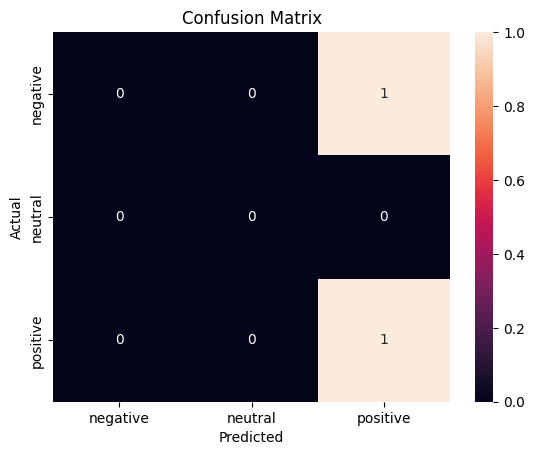

In [13]:
best_model = models["Logistic Regression"]
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=best_model.classes_,
    yticklabels=best_model.classes_
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned])
    return best_model.predict(vector)[0]

predict_sentiment("I really enjoy learning linguistic data science")


'positive'

## Conclusion
This notebook demonstrates how linguistic preprocessing techniques
can be combined with machine learning models to analyze sentiment in text data.
The approach highlights the intersection of linguistics and data science,
which is central to Linguistic Data Science research.
